In [1]:
import pandas as pd

# Load FAOSTAT dataset
faostat_file = 'FAOSTAT_data_en_11-19-2025.csv'
df_faostat = pd.read_csv(faostat_file)

# Load Crop Recommendation dataset
crop_rec_file = 'Crop_recommendation.csv'
df_crop_rec = pd.read_csv(crop_rec_file)


In [2]:
# Optional: display settings
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

In [3]:
# 1) Title and FAOSTAT preview (boxed)
from IPython.display import display  # Jupyter’s rich display [web:27][web:31]

print("FAOSTAT clean preview:\n")
display(df_faostat.head(10))   # boxed table


FAOSTAT clean preview:



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,"Anise, badian, c...",2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,"Anise, badian, c...",2000,2000,kg/ha,484.0,A,Official figure,NaN
2,QCL,Crops and livest...,356,India,5510,Production,1654.0,"Anise, badian, c...",2000,2000,t,166692.0,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,QCL,Crops and livest...,356,India,5412,Yield,1654.0,"Anise, badian, c...",2002,2002,kg/ha,296.8,A,Official figure,NaN
8,QCL,Crops and livest...,356,India,5510,Production,1654.0,"Anise, badian, c...",2002,2002,t,162362.0,A,Official figure,NaN
9,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,"Anise, badian, c...",2003,2003,ha,476618.0,A,Official figure,NaN


In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)   # show all rows, no "..."
# or set a large number, e.g.
# pd.set_option('display.max_rows', 1000)

Crop_Recommendation_clean_preview = df_crop_rec.head(10)  # if you made a subset
Crop_Recommendation_clean_preview


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
# Rename 'Item' column in FAOSTAT dataset to 'Crop'
df_faostat.rename(columns={'Item': 'Crop'}, inplace=True)

# Rename 'label' column in Crop Recommendation dataset to 'Crop'
df_crop_rec.rename(columns={'label': 'Crop'}, inplace=True)

# Check the renamed columns
print(df_faostat.columns)
print(df_crop_rec.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Crop', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')


In [6]:
# Split the 'Crop' column by commas into lists
df_faostat['Crop'] = df_faostat['Crop'].str.split(',')

# Explode the lists so each crop gets its own row
df_faostat = df_faostat.explode('Crop')

# Remove leading and trailing whitespace from each crop name
df_faostat['Crop'] = df_faostat['Crop'].str.strip()

# Check the result
print(df_faostat[['Crop']].head(10))

                  Crop
0                Anise
0               badian
0            coriander
0                cumin
0              caraway
0  fennel and junip...
0                  raw
1                Anise
1               badian
1            coriander


In [7]:
# After explode
df_exploded = df_faostat.explode('Crop')

# Display the first 10 rows
from IPython.display import display
display(df_exploded.head(10))


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,Anise,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,badian,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,coriander,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,cumin,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,caraway,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,fennel and junip...,2000,2000,ha,344434.0,A,Official figure,NaN
0,QCL,Crops and livest...,356,India,5312,Area harvested,1654.0,raw,2000,2000,ha,344434.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,Anise,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,badian,2000,2000,kg/ha,484.0,A,Official figure,NaN
1,QCL,Crops and livest...,356,India,5412,Yield,1654.0,coriander,2000,2000,kg/ha,484.0,A,Official figure,NaN


In [8]:
# View the first 10 rows of the Crop column
print(df_faostat['Crop'].head(10))

# Check number of unique crops
print(f'Number of unique crops: {df_faostat["Crop"].nunique()}')

# Check if any rows still contain commas (should be zero)
print(f'Rows with commas: {(df_faostat["Crop"].str.contains(",")).sum()}')

0                  Anise
0                 badian
0              coriander
0                  cumin
0                caraway
0    fennel and junip...
0                    raw
1                  Anise
1                 badian
1              coriander
Name: Crop, dtype: object
Number of unique crops: 110
Rows with commas: 0


In [9]:
# Normalize crop names by converting to lowercase and stripping whitespace
df_faostat['Crop_norm'] = df_faostat['Crop'].str.lower().str.strip()
df_crop_rec['Crop_norm'] = df_crop_rec['Crop'].str.lower().str.strip()

# Merge datasets on the normalized crop names
df_merged = pd.merge(
    df_faostat,
    df_crop_rec,
    left_on='Crop_norm',
    right_on='Crop_norm',
    how='inner'
)

# Check merged dataset shape and preview
print(f'Merged dataset shape: {df_merged.shape}')
print(df_merged.head())

Merged dataset shape: (28800, 24)
  Domain Code               Domain  Area Code (M49)   Area  Element Code  \
0         QCL  Crops and livest...              356  India          5312   
1         QCL  Crops and livest...              356  India          5312   
2         QCL  Crops and livest...              356  India          5312   
3         QCL  Crops and livest...              356  India          5312   
4         QCL  Crops and livest...              356  India          5312   

          Element  Item Code (CPC)  Crop_x  Year Code  Year Unit     Value  \
0  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
1  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
2  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
3  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   
4  Area harvested           1610.0  Coffee       2000  2000   ha  308433.0   

  Flag Flag Description Note Crop_norm  

In [10]:
from IPython.display import display  # only once at top of notebook

# Show shape in text
print(f'Merged dataset shape: {df_merged.shape}')

# Show nice boxed table for the first rows
display(df_merged.head(10))   # no print(), this gives the HTML box


Merged dataset shape: (28800, 24)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
5,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,23,25,23.412371,52.269947,6.869720,139.367075,coffee
6,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee
7,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,89,25,34,23.078954,63.658615,7.184802,129.876544,coffee
8,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,118,18,32,27.649611,51.110440,6.351824,122.839282,coffee
9,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,111,32,34,25.467437,69.351612,6.392048,171.376446,coffee


In [11]:
# Save the merged dataset - CORRECT variable name
df_merged.to_csv('mergedoutput.csv', index=False)
print("Merged dataset saved as 'mergedoutput.csv'")
print(f"Shape: {df_merged.shape}")


Merged dataset saved as 'mergedoutput.csv'
Shape: (28800, 24)


In [12]:
# Load the saved merged data anytime
df_merged = pd.read_csv('mergedoutput.csv')
print("Loaded merged dataset:")
display(df_merged.head())


Loaded merged dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [13]:
print("Actual columns:")
print(df_merged.columns.tolist())
print("\nFirst few rows:")
display(df_merged.head())


Actual columns:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Crop_x', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_y']

First few rows:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
0,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,QCL,Crops and livest...,356,India,5312,Area harvested,1610.0,Coffee,2000,2000,ha,308433.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [14]:
# Check unique values in the Element column
print("Unique values in Element column:")
print(df_merged['Element'].unique())

Unique values in Element column:
['Area harvested' 'Yield' 'Production']


In [15]:
# Get value counts for each Element type
print("\nCount of each Element type:")
element_counts = df_merged['Element'].value_counts()
print(element_counts)



Count of each Element type:
Element
Area harvested    9600
Yield             9600
Production        9600
Name: count, dtype: int64


In [16]:
# Display with Element Code for reference
print("\nElement types with their codes:")
df_merged[['Element Code', 'Element']].drop_duplicates().sort_values('Element Code')


Element types with their codes:


,Element Code,Element
0,5312,Area harvested
100,5412,Yield
200,5510,Production


In [17]:
# Keep only Production rows (filter by Element column)
df_production_only = df_merged[df_merged['Element'] == 'Production'].copy()


In [18]:
# Verify the filter worked
print(f"Original shape: {df_merged.shape}")
print(f"Production only shape: {df_production_only.shape}")
print("\nUnique Element values now:")
print(df_production_only['Element'].unique())


Original shape: (28800, 24)
Production only shape: (9600, 24)

Unique Element values now:
['Production']


In [19]:
# Display first few rows to confirm
display(df_production_only.head())

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Crop_x,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Crop_y
200,QCL,Crops and livest...,356,India,5510,Production,1610.0,Coffee,2000,2000,t,292000.0,A,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
201,QCL,Crops and livest...,356,India,5510,Production,1610.0,Coffee,2000,2000,t,292000.0,A,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
202,QCL,Crops and livest...,356,India,5510,Production,1610.0,Coffee,2000,2000,t,292000.0,A,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
203,QCL,Crops and livest...,356,India,5510,Production,1610.0,Coffee,2000,2000,t,292000.0,A,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
204,QCL,Crops and livest...,356,India,5510,Production,1610.0,Coffee,2000,2000,t,292000.0,A,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


In [20]:
# Check all columns currently in df_production_only
print("All columns in df_production_only:")
print(df_production_only.columns.tolist())
print(f"\nTotal columns: {len(df_production_only.columns)}")
print(f"Shape: {df_production_only.shape}")


All columns in df_production_only:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Crop_x', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_y']

Total columns: 24
Shape: (9600, 24)


In [21]:
# Quick preview of data types and non-null counts
print("\nColumn info summary:")
print(df_production_only.info())


Column info summary:
<class 'pandas.core.frame.DataFrame'>
Index: 9600 entries, 200 to 28799
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9600 non-null   object 
 1   Domain            9600 non-null   object 
 2   Area Code (M49)   9600 non-null   int64  
 3   Area              9600 non-null   object 
 4   Element Code      9600 non-null   int64  
 5   Element           9600 non-null   object 
 6   Item Code (CPC)   9600 non-null   float64
 7   Crop_x            9600 non-null   object 
 8   Year Code         9600 non-null   int64  
 9   Year              9600 non-null   int64  
 10  Unit              9600 non-null   object 
 11  Value             9600 non-null   float64
 12  Flag              9600 non-null   object 
 13  Flag Description  9600 non-null   object 
 14  Note              0 non-null      float64
 15  Crop_norm         9600 non-null   object 
 16  N                 9600

In [22]:
# The merge was done on normalized crop names (lowercase + stripped)
print("Merge columns used:")
print("Left dataset (FAOSTAT): 'Cropnorm' (from exploded 'Crop' column)")
print("Right dataset (Crop Rec): 'Cropnorm' (from 'Crop' column)")


Merge columns used:
Left dataset (FAOSTAT): 'Cropnorm' (from exploded 'Crop' column)
Right dataset (Crop Rec): 'Cropnorm' (from 'Crop' column)


In [25]:
# First, check EXACT column names (case-sensitive issue)
print("EXACT columns in df_production_only:")
print(df_production_only.columns.tolist())

EXACT columns in df_production_only:
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Crop_x', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_y']


In [27]:
# Save df_production_only FIRST
df_production_only.to_csv('df_production_only.csv', index=False)
print("\n✅ df_production_only saved as 'df_production_only.csv'")


✅ df_production_only saved as 'df_production_only.csv'


In [29]:
# FIRST: Print EXACT column names to see what's available
print("=== EXACT COLUMN NAMES IN df_production_only ===")
print(df_production_only.columns.tolist())
print(f"\nShape: {df_production_only.shape}")
print("\n=== END COLUMNS LIST ===\n")


=== EXACT COLUMN NAMES IN df_production_only ===
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Crop_x', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop_y']

Shape: (9600, 24)

=== END COLUMNS LIST ===



In [30]:
# Save df_production_only FIRST (this always works)
df_production_only.to_csv('df_production_only.csv', index=False)
print("✅ df_production_only SAVED as 'df_production_only.csv'")

✅ df_production_only SAVED as 'df_production_only.csv'


In [31]:
# NOW select columns SAFELY - only columns that exist
available_cols = [col for col in ['Crop_norm', 'Cropnorm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Value'] 
                  if col in df_production_only.columns]
print(f"\n✅ Available columns found: {available_cols}")

df_production_clean = df_production_only[available_cols].copy()
print(f"\n✅ Clean dataset created: {df_production_clean.shape}")
display(df_production_clean.head())


✅ Available columns found: ['Crop_norm', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Value']

✅ Clean dataset created: (9600, 9)


,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Value
200,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,292000.0
201,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,292000.0
202,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,292000.0
203,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,292000.0
204,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,292000.0


In [32]:
# 1. Save the clean dataset
df_production_clean.to_csv('df_production_clean.csv', index=False)
print("✅ df_production_clean SAVED")


✅ df_production_clean SAVED


In [33]:
# 2. Quick data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_production_clean.isnull().sum())
print(f"\nUnique crops: {df_production_clean['Crop_norm'].nunique()}")
print(f"Production range: {df_production_clean['Value'].min():,.0f} - {df_production_clean['Value'].max():,.0f} tonnes")



=== DATA QUALITY CHECK ===
Missing values per column:
Crop_norm      0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Value          0
dtype: int64

Unique crops: 4
Production range: 262,000 - 206,727,000 tonnes


In [34]:
# 3. Preview by crop
print("\nTop 5 crops by row count:")
print(df_production_clean['Crop_norm'].value_counts().head())


Top 5 crops by row count:
Crop_norm
coffee    2400
grapes    2400
jute      2400
rice      2400
Name: count, dtype: int64


In [35]:
print("=== SUMMARY STATISTICS ===")

# 1. Numerical columns summary
print("\n📊 NUMERICAL COLUMNS:")
display(df_production_clean.describe())

=== SUMMARY STATISTICS ===

📊 NUMERICAL COLUMNS:


,N,P,K,temperature,humidity,ph,rainfall,Value
count,9600.000000,9600.00000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9.600000e+03
mean,70.667500,63.92750,77.477500,24.509440,75.664440,6.493623,159.663009,4.012885e+07
std,31.213033,41.00826,70.994257,5.098699,10.574704,0.593988,63.735591,6.817683e+07
min,0.000000,15.00000,25.000000,8.825675,50.045570,5.005307,65.010953,2.620000e+05
25%,55.000000,37.00000,35.000000,23.176366,70.648966,6.085485,105.096066,7.475250e+05
50%,79.000000,47.00000,40.000000,24.846438,80.719235,6.428868,168.977582,1.842500e+06
75%,92.000000,75.00000,82.500000,26.392599,82.739731,6.981234,194.931719,2.973758e+07
max,120.000000,145.00000,205.000000,41.948657,89.891065,7.868475,298.560117,2.067270e+08


In [36]:
# 2. Categorical columns summary  
print("\n🏷️  CATEGORICAL COLUMNS:")
print("Unique crops:", df_production_clean['Crop_norm'].nunique())
print("Top 10 crops by frequency:")
print(df_production_clean['Crop_norm'].value_counts().head(10))



🏷️  CATEGORICAL COLUMNS:
Unique crops: 4
Top 10 crops by frequency:
Crop_norm
coffee    2400
grapes    2400
jute      2400
rice      2400
Name: count, dtype: int64


In [37]:
# 3. Data quality overview
print("\n✅ DATA QUALITY:")
print("Shape:", df_production_clean.shape)
print("Missing values per column:")
missing = df_production_clean.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")



✅ DATA QUALITY:
Shape: (9600, 9)
Missing values per column:
No missing values!


In [38]:
# 4. Production insights
print("\n🌾 PRODUCTION INSIGHTS:")
print(f"Total production: {df_production_clean['Value'].sum():,.0f} tonnes")
print(f"Avg production per crop: {df_production_clean['Value'].mean():,.0f} tonnes")
print(f"Max production: {df_production_clean['Value'].max():,.0f} tonnes")
print(f"Min production: {df_production_clean['Value'].min():,.0f} tonnes")


🌾 PRODUCTION INSIGHTS:
Total production: 385,236,953,098 tonnes
Avg production per crop: 40,128,849 tonnes
Max production: 206,727,000 tonnes
Min production: 262,000 tonnes


In [39]:
# 5. Nutrient & Environment ranges
print("\n🧪 NUTRIENT RANGES:")
print(f"N: {df_production_clean['N'].min():.0f} - {df_production_clean['N'].max():.0f}")
print(f"P: {df_production_clean['P'].min():.0f} - {df_production_clean['P'].max():.0f}")
print(f"K: {df_production_clean['K'].min():.0f} - {df_production_clean['K'].max():.0f}")


🧪 NUTRIENT RANGES:
N: 0 - 120
P: 15 - 145
K: 25 - 205


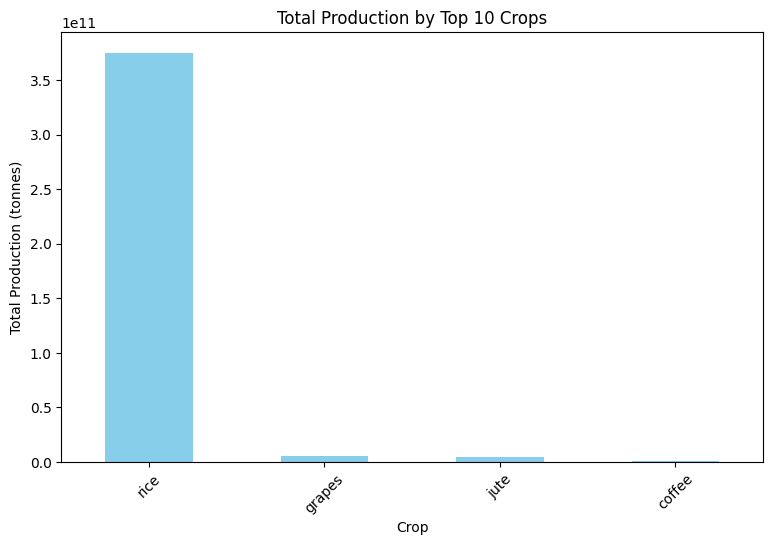

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot 1: Production by Crop (Top 10 crops - Total production)
plt.subplot(2, 2, 1)
crop_totals = df_production_clean.groupby('Crop_norm')['Value'].sum().sort_values(ascending=False).head(10)
crop_totals.plot(kind='bar', color='skyblue')
plt.title('Total Production by Top 10 Crops')
plt.ylabel('Total Production (tonnes)')
plt.xlabel('Crop')
plt.xticks(rotation=45)
plt.tight_layout()

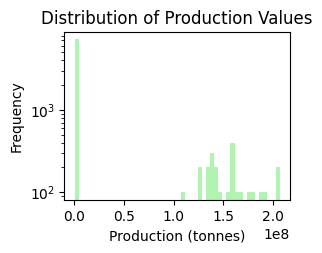

In [41]:

# Plot 2: Production distribution
plt.subplot(2, 2, 2)
plt.hist(df_production_clean['Value'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Distribution of Production Values')
plt.xlabel('Production (tonnes)')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visibility

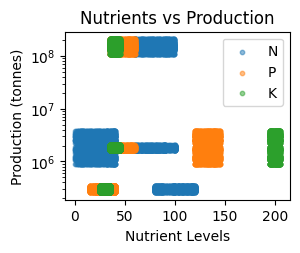

In [42]:
# Plot 3: Nutrients correlation with Production
plt.subplot(2, 2, 3)
nutrients = ['N', 'P', 'K']
for nutrient in nutrients:
    plt.scatter(df_production_clean[nutrient], df_production_clean['Value'], 
                alpha=0.5, label=nutrient, s=10)
plt.title('Nutrients vs Production')
plt.xlabel('Nutrient Levels')
plt.ylabel('Production (tonnes)')
plt.legend()
plt.yscale('log')

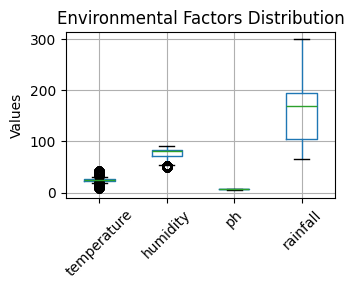

In [43]:
# Plot 4: Environmental factors boxplot
plt.subplot(2, 2, 4)
env_cols = ['temperature', 'humidity', 'ph', 'rainfall']
df_production_clean[env_cols].boxplot()
plt.title('Environmental Factors Distribution')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

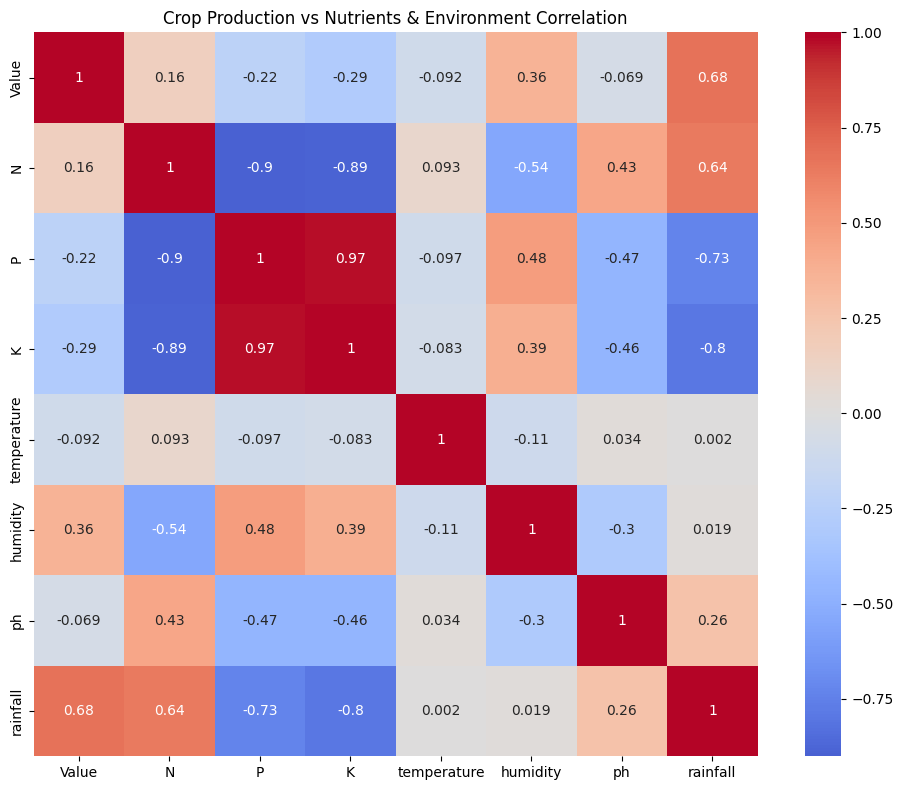

In [44]:
# Numeric correlations
numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
corr_matrix = df_production_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Crop Production vs Nutrients & Environment Correlation')
plt.tight_layout()
plt.show()


In [45]:
print("=== QUICK INSIGHTS ===")
insights = pd.DataFrame({
    'Metric': [
        'Total Rows', 
        'Unique Crops', 
        'Avg Production (tonnes)', 
        'High N Crops (>100)', 
        'High P Crops (>50)',
        'High K Crops (>50)',
        'High Rainfall Crops (>200mm)'
    ],
    'Value': [
        len(df_production_clean),
        df_production_clean['Crop_norm'].nunique(),
        f"{df_production_clean['Value'].mean():,.0f}",
        len(df_production_clean[df_production_clean['N'] > 100]['Crop_norm'].unique()),
        len(df_production_clean[df_production_clean['P'] > 50]['Crop_norm'].unique()),
        len(df_production_clean[df_production_clean['K'] > 50]['Crop_norm'].unique()),
        len(df_production_clean[df_production_clean['rainfall'] > 200]['Crop_norm'].unique())
    ]
})
display(insights)


=== QUICK INSIGHTS ===


,Metric,Value
0,Total Rows,9600
1,Unique Crops,4
2,Avg Production (...,"40,128,849"
3,High N Crops (>100),1
4,High P Crops (>50),3
5,High K Crops (>50),1
6,High Rainfall Cr...,1


In [46]:
# 1. Check for null values
print("=== NULL VALUES CHECK ===")
null_counts = df_production_clean.isnull().sum()
print(null_counts)
print(f"\nTotal null values: {null_counts.sum()}")


=== NULL VALUES CHECK ===
Crop_norm      0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Value          0
dtype: int64

Total null values: 0


In [47]:
# 2. Show which rows have nulls (if any)
null_rows = df_production_clean[df_production_clean.isnull().any(axis=1)]
print(f"\nRows with any nulls: {len(null_rows)}")
if len(null_rows) > 0:
    print("Sample null rows:")
    display(null_rows.head())




Rows with any nulls: 0


In [48]:
# 3. Remove null values
df_production_clean_no_nulls = df_production_clean.dropna()

In [49]:
# 4. Verify cleaning
print(f"\n=== CLEANING RESULTS ===")
print(f"Before: {df_production_clean.shape}")
print(f"After:  {df_production_clean_no_nulls.shape}")
print(f"Rows removed: {len(df_production_clean) - len(df_production_clean_no_nulls)}")




=== CLEANING RESULTS ===
Before: (9600, 9)
After:  (9600, 9)
Rows removed: 0


In [50]:
# 5. Final confirmation
print("\nFinal null check:")
print(df_production_clean_no_nulls.isnull().sum().sum(), "null values remaining")

# Update your main dataframe
df_production_clean = df_production_clean_no_nulls.copy()
print("\n✅ df_production_clean updated - NULL-FREE!")



Final null check:
0 null values remaining

✅ df_production_clean updated - NULL-FREE!


In [51]:
# 1. Check for duplicates
print("=== DUPLICATES CHECK ===")
total_rows = len(df_production_clean)
duplicate_rows = df_production_clean.duplicated().sum()
print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_rows}")
print(f"Duplicate %: {(duplicate_rows/total_rows)*100:.2f}%")


=== DUPLICATES CHECK ===
Total rows: 9600
Duplicate rows: 100
Duplicate %: 1.04%


In [52]:
# 2. Show sample duplicates (if any)
if duplicate_rows > 0:
    print("\nSample duplicate rows:")
    duplicates = df_production_clean[df_production_clean.duplicated(keep=False)]
    display(duplicates.head())


Sample duplicate rows:


,Crop_norm,N,P,K,temperature,humidity,ph,rainfall,Value
500,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,301000.0
501,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,301000.0
502,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,301000.0
503,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,301000.0
504,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,301000.0


In [53]:
# 3. Remove duplicates (keep first occurrence)
df_production_clean_no_dups = df_production_clean.drop_duplicates()


In [54]:
# 4. Verify cleaning
print(f"\n=== CLEANING RESULTS ===")
print(f"Before: {df_production_clean.shape}")
print(f"After:  {df_production_clean_no_dups.shape}")
print(f"Rows removed: {len(df_production_clean) - len(df_production_clean_no_dups)}")



=== CLEANING RESULTS ===
Before: (9600, 9)
After:  (9500, 9)
Rows removed: 100


In [55]:
# 5. Final confirmation
print("\nFinal duplicate check:")
print(f"Remaining duplicates: {df_production_clean_no_dups.duplicated().sum()}")

# Update your main dataframe
df_production_clean = df_production_clean_no_dups.copy()
print("\n✅ df_production_clean updated - DUPLICATE-FREE!")
print(f"🎉 FINAL CLEAN DATASET: {df_production_clean.shape}")


Final duplicate check:
Remaining duplicates: 0

✅ df_production_clean updated - DUPLICATE-FREE!
🎉 FINAL CLEAN DATASET: (9500, 9)


In [56]:
# Outlier removal using IQR method (Industry standard)
print("=== OUTLIER DETECTION & REMOVAL ===")

# Define numerical columns for outlier detection
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Value']

# Calculate IQR and detect outliers
outliers_count = 0
outlier_mask = pd.Series([True] * len(df_production_clean), index=df_production_clean.index)

for col in numeric_cols:
    Q1 = df_production_clean[col].quantile(0.25)
    Q3 = df_production_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    col_outliers = ((df_production_clean[col] < lower_bound) | (df_production_clean[col] > upper_bound))
    outliers_count += col_outliers.sum()
    outlier_mask &= ~col_outliers  # Keep only non-outliers
    
    print(f"{col}: {col_outliers.sum()} outliers ({col_outliers.mean()*100:.1f}%)")

=== OUTLIER DETECTION & REMOVAL ===
N: 0 outliers (0.0%)
P: 0 outliers (0.0%)
K: 0 outliers (0.0%)
temperature: 1392 outliers (14.7%)
humidity: 552 outliers (5.8%)
ph: 0 outliers (0.0%)
rainfall: 0 outliers (0.0%)
Value: 0 outliers (0.0%)


In [57]:
# Remove outliers
df_production_clean_no_outliers = df_production_clean[outlier_mask].copy()

print(f"\n=== CLEANING RESULTS ===")
print(f"Before: {df_production_clean.shape}")
print(f"After:  {df_production_clean_no_outliers.shape}")
print(f"Rows removed: {len(df_production_clean) - len(df_production_clean_no_outliers)} ({((len(df_production_clean) - len(df_production_clean_no_outliers))/len(df_production_clean)*100):.1f}%)")



=== CLEANING RESULTS ===
Before: (9500, 9)
After:  (7556, 9)
Rows removed: 1944 (20.5%)


In [58]:
# Update main dataframe
df_production_clean = df_production_clean_no_outliers.copy()
print(f"\n✅ df_production_clean updated - OUTLIER-FREE!")
print(f"🎉 FINAL CLEAN DATASET: {df_production_clean.shape}")

# Quick verification
print("\n=== POST-CLEANING SUMMARY ===")
print(df_production_clean[numeric_cols].describe())


✅ df_production_clean updated - OUTLIER-FREE!
🎉 FINAL CLEAN DATASET: (7556, 9)

=== POST-CLEANING SUMMARY ===
                 N            P            K  temperature     humidity  \
count  7556.000000  7556.000000  7556.000000  7556.000000  7556.000000   
mean     76.605744    54.337877    58.924563    24.659379    76.493658   
std      26.424184    32.615609    55.504517     2.197615     9.420263   
min       0.000000    15.000000    25.000000    18.426994    53.741447   
25%      67.000000    37.000000    35.000000    23.417990    71.313429   
50%      82.000000    45.000000    39.000000    24.886928    80.687005   
75%      93.000000    55.000000    43.000000    26.243936    82.852840   
max     120.000000   145.000000   204.000000    31.110473    89.891065   

                ph     rainfall         Value  
count  7556.000000  7556.000000  7.556000e+03  
mean      6.554424   176.511928  5.056078e+07  
std       0.598508    57.704258  7.344452e+07  
min       5.005307    65.34440

In [59]:
print("\n=== QUALITY CHECK ===")
print("Unique crops remaining:", df_production_clean['Crop_norm'].nunique())
print("No nulls:", df_production_clean.isnull().sum().sum() == 0)
print("No duplicates:", df_production_clean.duplicated().sum() == 0)



=== QUALITY CHECK ===
Unique crops remaining: 4
No nulls: True
No duplicates: True


In [60]:
# Save your perfect dataset
df_production_clean.to_csv('df_production_final_clean.csv', index=False)
print("\n✅ SAVED: df_production_final_clean.csv")



✅ SAVED: df_production_final_clean.csv


=== CROPS & COUNTS (Final Clean Dataset) ===
Total unique crops: 4
Total rows: 7556


,Crop,Count,% of Total
0,rice,2400,31.8
1,jute,2400,31.8
2,coffee,1748,23.1
3,grapes,1008,13.3


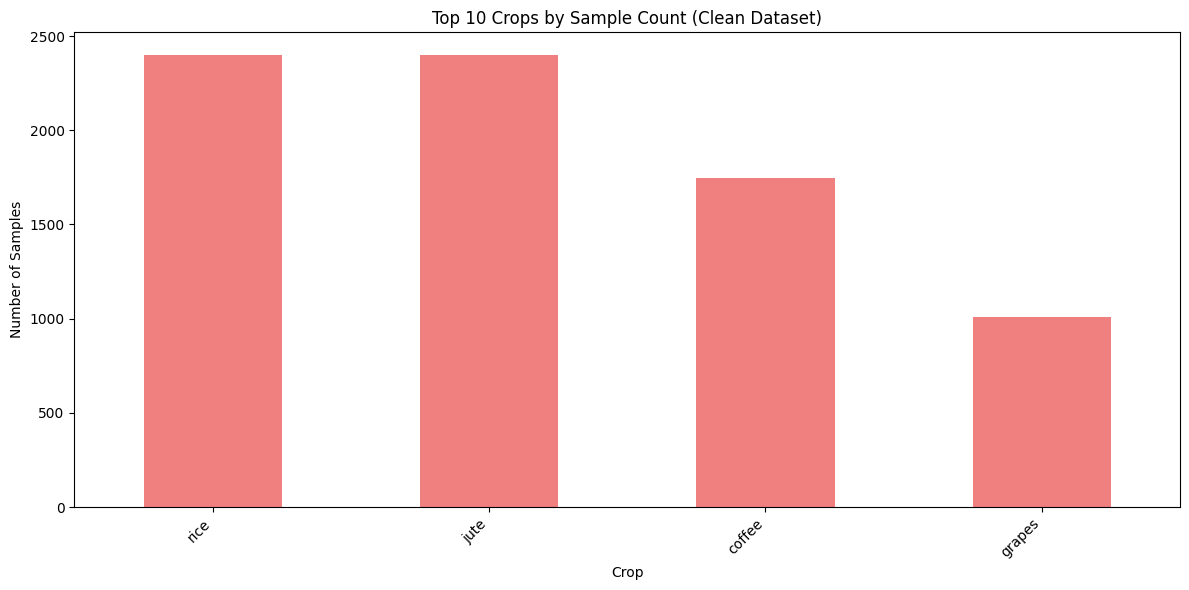

In [61]:
# Display crops and their counts
print("=== CROPS & COUNTS (Final Clean Dataset) ===")

crop_counts = df_production_clean['Crop_norm'].value_counts().sort_values(ascending=False)
print(f"Total unique crops: {len(crop_counts)}")
print(f"Total rows: {len(df_production_clean)}")

# Display as table
crop_df = pd.DataFrame({
    'Crop': crop_counts.index,
    'Count': crop_counts.values,
    '% of Total': (crop_counts.values / len(df_production_clean) * 100).round(1)
})
display(crop_df)

# Top 10 crops chart
plt.figure(figsize=(12, 6))
top_crops = crop_counts.head(10)
top_crops.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Crops by Sample Count (Clean Dataset)')
plt.xlabel('Crop')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
